In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS" -O images.zip && rm -rf /tmp/cookies.txt

--2021-09-22 18:20:27--  https://docs.google.com/uc?export=download&confirm=YqkF&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS
Resolving docs.google.com (docs.google.com)... 108.177.11.139, 108.177.11.113, 108.177.11.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-ao-docs.googleusercontent.com/docs/securesc/m0lanc7432na06qq97l581dksqf6ilcp/oo2lfrok8t9js7c5c8u63t4408b27s2f/1632334800000/06049624160957438625/14543447198508307950Z/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download [following]
--2021-09-22 18:20:27--  https://doc-0k-ao-docs.googleusercontent.com/docs/securesc/m0lanc7432na06qq97l581dksqf6ilcp/oo2lfrok8t9js7c5c8u63t4408b27s2f/1632334800000/06049624160957438625/14543447198508307950Z/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download
Resolving doc-0k-ao-docs.googleusercontent.com (doc-0k-ao-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connectin

In [ ]:
Unzip-ovanje podataka:

In [ ]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

Klasifikacija koriscenjem CNN-a:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [ ]:
data.shape

(7095, 3)

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

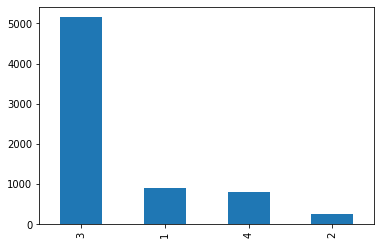

In [ ]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

Augmentacija slika:

In [ ]:
l1=[]
l2=[] 
for img,ClassId,EncodedPixels in tqdm(data.values):
    image=cv2.imread("/content/train_images/{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(120,120))
    l1.append(image)
    l2.append(ClassId)

100%|██████████| 7095/7095 [00:51<00:00, 138.54it/s]


Provera nasumičnih slika:

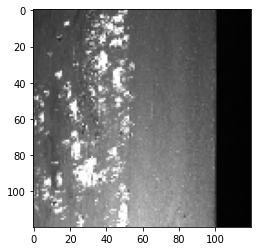

In [ ]:
i = 12
plt.imshow(l1[i])

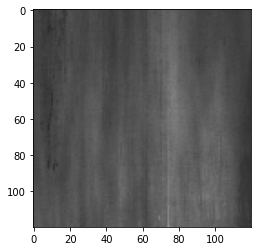

In [ ]:
i = 43
plt.imshow(l1[i])

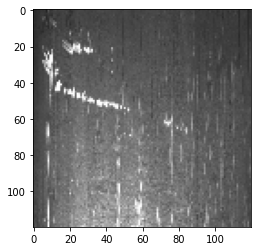

In [ ]:
i = 99
plt.imshow(l1[i])

Normalizovanje pixela da bi bili u vrednosti od 0 do 1, radi lakšeg
procesiranja:

In [ ]:
encoder = LabelEncoder()

X= np.array(l1)
X = X/255

y = encoder.fit_transform(l2)
y = to_categorical(y)

Podela podataka za treniranje i testiranje:

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True, random_state=50)

In [ ]:
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (5676, 120, 120, 3)
x_test shape: (1419, 120, 120, 3)
y_train shape: (5676, 4)
y_test shape: (1419, 4)


Pravljenje CNN modela:

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

Kompajliranje modela i minimizacija greške:

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/15
45/45 [==============================] - 70s 2s/step - loss: 0.8024 - accuracy: 0.7232 - val_loss: 0.7106 - val_accuracy: 0.7442
Epoch 2/15
45/45 [==============================] - 68s 2s/step - loss: 0.6734 - accuracy: 0.7435 - val_loss: 0.6635 - val_accuracy: 0.7512
Epoch 3/15
45/45 [==============================] - 69s 2s/step - loss: 0.6250 - accuracy: 0.7565 - val_loss: 0.6657 - val_accuracy: 0.7174
Epoch 4/15
45/45 [==============================] - 68s 2s/step - loss: 0.5923 - accuracy: 0.7622 - val_loss: 0.5898 - val_accuracy: 0.7533
Epoch 5/15
45/45 [==============================] - 68s 2s/step - loss: 0.5557 - accuracy: 0.7717 - val_loss: 0.5753 - val_accuracy: 0.7674
Epoch 6/15
45/45 [==============================] - 68s 2s/step - loss: 0.5557 - accuracy: 0.7703 - val_loss: 0.5617 - val_accuracy: 0.7689
Epoch 7/15
45/45 [==============================] - 68s 2s/step - loss: 0.5085 - accuracy: 0.7863 - val_loss: 0.5492 - val_accuracy: 0.7766
Epoch 8/15
45/45 [==


Na 8 epohi dobijamo preciznost od 77% (val_accuracy) i gubitak validacije 0.56 (val_loss)



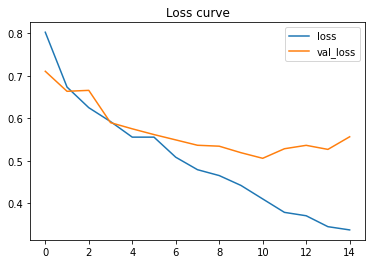

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

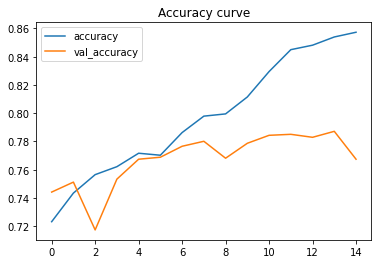

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [ ]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 5s 110ms/step - loss: 0.5565 - accuracy: 0.7674
[+] Accuracy: 76.74%


Dobijamo preciznost od 76.74% korišćenjem CNN.

**Detekcija ostecenja**

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

import random

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
print('Shape of dataframe: ', df.shape)
df.head()

Shape of dataframe:  (7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:
df['ImageId'] = df['ImageId'].apply(lambda x: x.strip())
df.ImageId.describe()

count              7095
unique             6666
top       ef24da2ba.jpg
freq                  3
Name: ImageId, dtype: object

In [ ]:
train_img_set = set(list(os.listdir('train_images')))
print('Total number of images in train_images folder: ', len(train_img_set))
defect_img_set = set(df['ImageId'].values)
print('Total number of images that are included in train.csv: ', len(defect_img_set))
if (defect_img_set.issubset(train_img_set)):
    print('All the ImageId that are mentioned in train.csv are present in train_images folder.')

Total number of images in train_images folder:  12568
Total number of images that are included in train.csv:  6666
All the ImageId that are mentioned in train.csv are present in train_images folder.


Number of ImageIds that are not defective:  5902


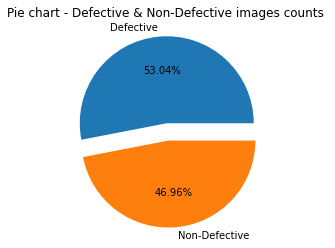

In [ ]:
print('Number of ImageIds that are not defective: ', len(train_img_set) - len(defect_img_set))
non_defect_img_set = train_img_set - defect_img_set

plt.pie([len(defect_img_set), len(non_defect_img_set)], labels = ['Defective', 'Non-Defective'], explode = [0.1]*2, startangle = 0, autopct='%1.2f%%')
plt.title('Pie chart - Defective & Non-Defective images counts ')
plt.show()

In [ ]:
df['ClassId'].astype('str').describe()

count     7095
unique       4
top          3
freq      5150
Name: ClassId, dtype: object

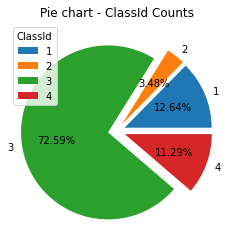

,ClassId,Count,count-percentage
0,1,897,12.642706
1,2,247,3.481325
2,3,5150,72.586328
3,4,801,11.289641


In [ ]:
ClassId_cnt_df = pd.DataFrame(df['ClassId'].value_counts().sort_index()).rename(columns = {'ClassId':'Count'})
ClassId_cnt_df['count-percentage'] = ClassId_cnt_df*100/ClassId_cnt_df.sum()

plt.pie(ClassId_cnt_df['Count'], labels = ClassId_cnt_df['Count'].index, explode = [0.1]*4, startangle = 0, autopct='%1.2f%%')
plt.legend(title = "ClassId")
plt.title('Pie chart - ClassId Counts')
plt.show()

ClassId_cnt_df.reset_index().rename(columns = {'index':'ClassId'})

In [ ]:
nos_labels_per_img_df = df.groupby('ImageId')['ClassId'].count()#reset_index()#.rename(columns = {'ClassId':'Count'})
nos_labels_per_img_df.head(10)

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
0025bde0c.jpg    2
002af848d.jpg    1
002fc4e19.jpg    2
0030401a5.jpg    1
0046839bd.jpg    1
Name: ClassId, dtype: int64

In [ ]:
data = nos_labels_per_img_df.value_counts().sort_index()
for index, value in data.items():
    print("Number of images with {} number of defect labels: {}".format(index, value))


Number of images with 1 number of defect labels: 6239
Number of images with 2 number of defect labels: 425
Number of images with 3 number of defect labels: 2


In [ ]:
img_shapes = set()
for img in list(os.listdir('train_images')):
    img_shapes.add(cv2.imread('train_images/'+img).shape)
img_shapes

{(256, 1600, 3)}

In [ ]:
def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

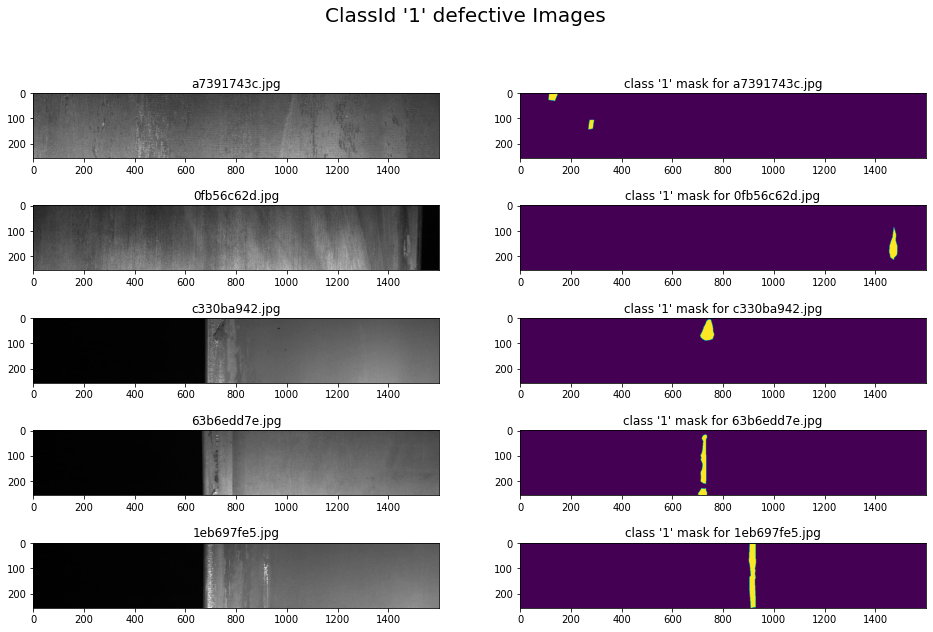

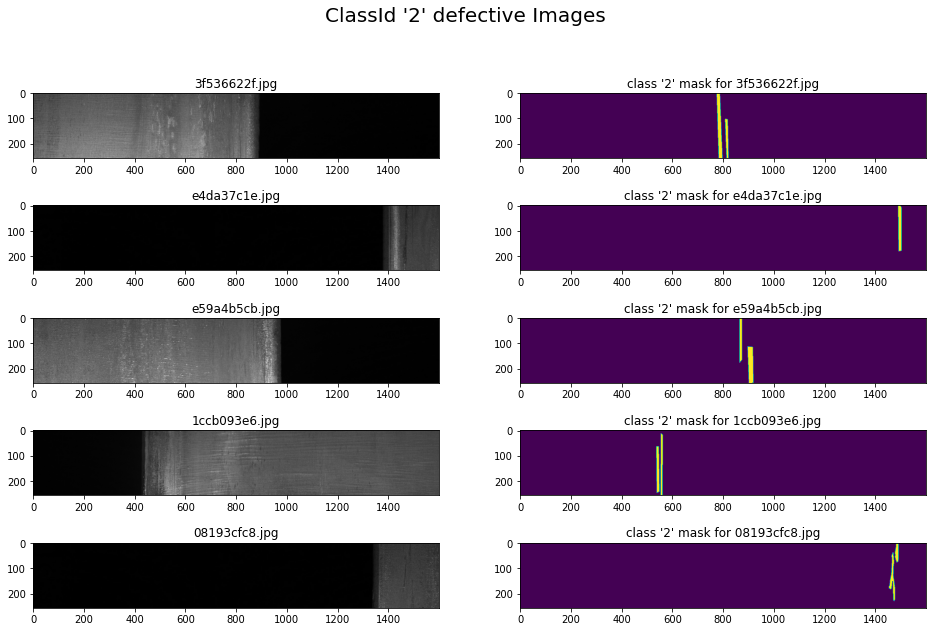

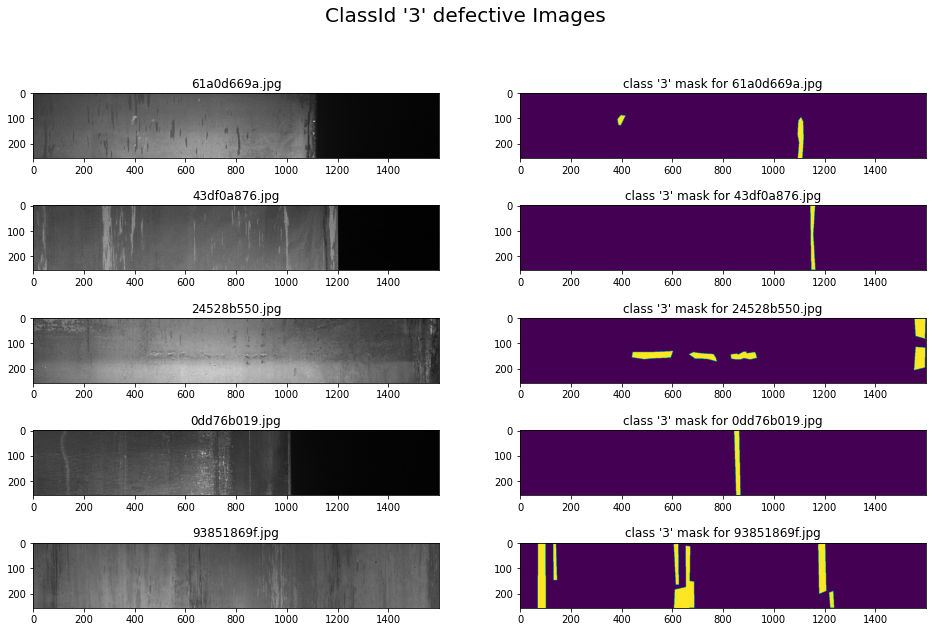

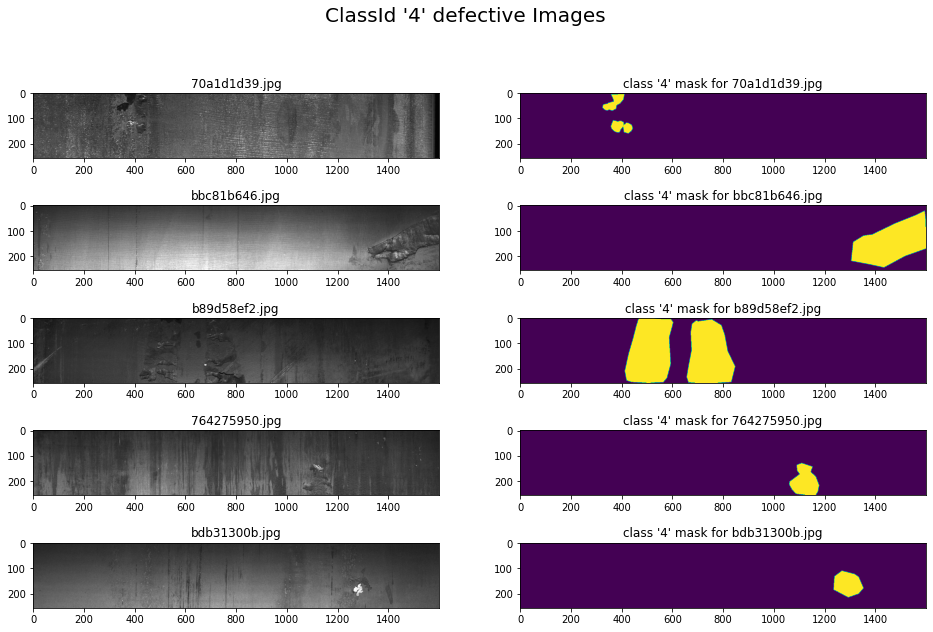

In [ ]:
for ClassId in [1,2,3,4]:
    class_df = df[df['ClassId'] == ClassId]
    fig, axs = plt.subplots(5, 2, figsize=(16,10))
    fig.suptitle("ClassId '{}' defective Images".format(ClassId), fontsize=20)
    x,y = 0,0
    for i, img_id in enumerate(random.sample(set(class_df['ImageId'].values), 5)):
        img_obj = cv2.imread('train_images/'+ img_id)
        axs[i,0].imshow(img_obj)
        axs[i,0].set_title(img_id)
        rle = class_df[class_df['ImageId'] == img_id]['EncodedPixels'].iloc[0]
        mask = rle2mask(rle)
        axs[i,1].imshow(mask)
        axs[i,1].set_title("class '{}' mask for ".format(ClassId) + img_id)
    plt.show()
    print('='*100)